In [1]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
# Since the quality values are only 6 types, we'll map the values from 0 to 5.
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# Using the map function of pandas to convert the values in the quality
# column to values in the dictionary.
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [3]:
# Shuffle the dataframe
df = df.sample(frac = 1).reset_index(drop = True)

# Splitting the dataframe
# First 1000 as training data
df_train = df.head(1000)

# Bottom 599 as testing/validation data
df_test = df.tail(599)

In [4]:
from sklearn import tree
from sklearn import metrics

# initialize decision tree classifier class with max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth = 3)

# Select the columns to train on; the features for the model
cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

# Train the model on the provided features
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [5]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on the training data set
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [6]:
train_accuracy, test_accuracy

(0.6, 0.5459098497495827)

## Full Deployment

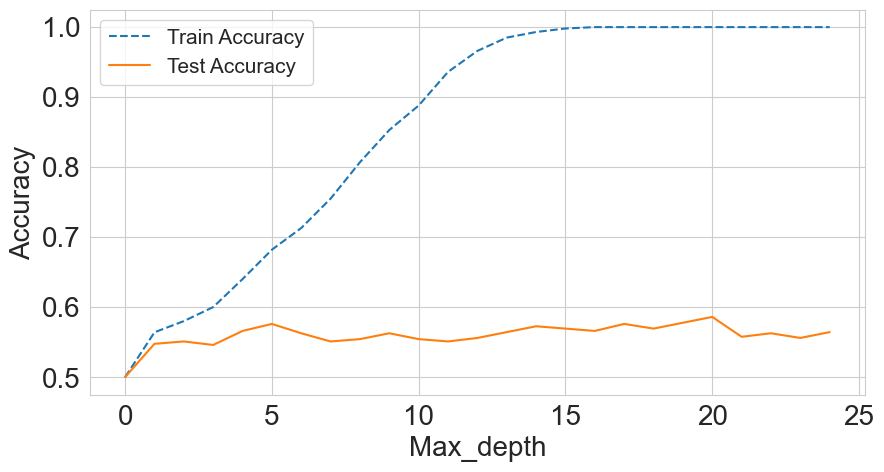

In [7]:
# import decision tree and metrics from scikit-learn
from sklearn import tree
from sklearn import metrics

# import matplotlib and seaborn for visualizing data
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Global size of the label on the plot
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

# Initialize lists to store the accuracies
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # initialize the model
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    # select the columns for training...
    cols = [
        'fixed acidity', 
        'volatile acidity',
        'citric acid', 
        'residual sugar', 
        'chlorides', 
        'free sulfur dioxide', 
        'total sulfur dioxide', 
        'density', 
        'pH', 
        'sulphates', 
        'alcohol']
    
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# create the plots using matplotlib and seaborn
plt.figure(figsize = (10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label = "Train Accuracy", linestyle = '--')
plt.plot(test_accuracies, label = "Test Accuracy")
plt.legend(loc = "upper left", prop = {'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("Max_depth", size = 20)
plt.ylabel("Accuracy", size = 20)
plt.show()